# Current population of Germany

In [1]:
import numpy as np
import pandas as pd
import missingno as msno
import matplotlib.pyplot as plt
import seaborn as sns
import os
import warnings
import datetime

# Options and Settings

In [2]:
%matplotlib inline
plt.style.use('ggplot')
plt.rcParams['figure.autolayout'] = True
plt.rcParams['figure.figsize'] = [12, 9]
plt.rcParams['font.size'] = 12
path = os.getcwd()                                         # get current working directory
warnings.simplefilter('ignore')

# Import Data

In [3]:
filepath = os.path.join(path, 'datasets', 'Population Germany, reference date.csv')
df = pd.read_csv(filepath)

# Head and Tail

In [4]:
df.rename(columns={'Date': 'ReferenceDate'}, inplace=True)
df

,ReferenceDate,Population
0,1950-12-31,50958125
1,1951-12-31,51434777
2,1952-12-31,51863761
3,1953-12-31,52453806
4,1954-12-31,52943295
...,...,...
66,2016-12-31,82521653
67,2017-12-31,82792351
68,2018-12-31,83019213
69,2019-12-31,83166711


In [5]:
df.shape             

(71, 2)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 71 entries, 0 to 70
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   ReferenceDate  71 non-null     object
 1   Population     71 non-null     int64 
dtypes: int64(1), object(1)
memory usage: 1.2+ KB


In [7]:
pd.value_counts(df.dtypes)

object    1
int64     1
dtype: int64

In [8]:
df['ReferenceDate'] = pd.to_datetime(df['ReferenceDate'])         # convert date series to datetime
df['ReferenceDate'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 71 entries, 0 to 70
Series name: ReferenceDate
Non-Null Count  Dtype         
--------------  -----         
71 non-null     datetime64[ns]
dtypes: datetime64[ns](1)
memory usage: 696.0 bytes


# Data Transformation

In [9]:
df['Year'] = df['ReferenceDate'].dt.year                          # extract year
df['Month'] = df['ReferenceDate'].dt.month                        # extract month
df['Day'] = df['ReferenceDate'].dt.day                            # extract day

df.head()

,ReferenceDate,Population,Year,Month,Day
0,1950-12-31,50958125,1950,12,31
1,1951-12-31,51434777,1951,12,31
2,1952-12-31,51863761,1952,12,31
3,1953-12-31,52453806,1953,12,31
4,1954-12-31,52943295,1954,12,31


In [10]:
df['PopPctChg'] = df['Population'].pct_change()                   # calculate population percentage change
df

,ReferenceDate,Population,Year,Month,Day,PopPctChg
0,1950-12-31,50958125,1950,12,31,NaN
1,1951-12-31,51434777,1951,12,31,0.009354
2,1952-12-31,51863761,1952,12,31,0.008340
3,1953-12-31,52453806,1953,12,31,0.011377
4,1954-12-31,52943295,1954,12,31,0.009332
...,...,...,...,...,...,...
66,2016-12-31,82521653,2016,12,31,0.004210
67,2017-12-31,82792351,2017,12,31,0.003280
68,2018-12-31,83019213,2018,12,31,0.002740
69,2019-12-31,83166711,2019,12,31,0.001777


In [11]:
df1 = df.iloc[:, [0,2, 3, 4, 1, 5]]                                   # change the column order 
df1.head()

,ReferenceDate,Year,Month,Day,Population,PopPctChg
0,1950-12-31,1950,12,31,50958125,NaN
1,1951-12-31,1951,12,31,51434777,0.009354
2,1952-12-31,1952,12,31,51863761,0.008340
3,1953-12-31,1953,12,31,52453806,0.011377
4,1954-12-31,1954,12,31,52943295,0.009332


<AxesSubplot:xlabel='Population', ylabel='Density'>

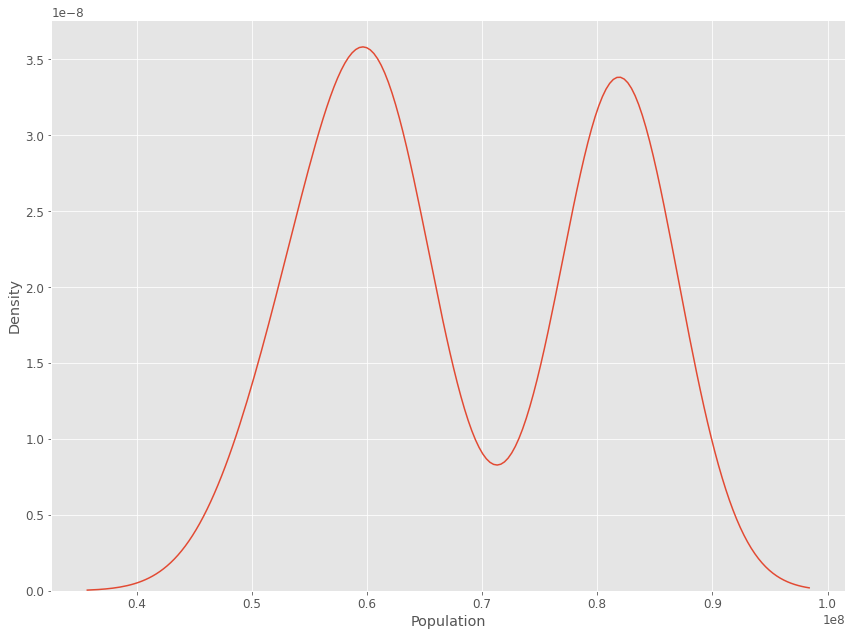

In [12]:
sns.kdeplot(data=df1, x='Population')

# Missing Values Exploration

In [13]:
df1.isna().sum()

ReferenceDate    0
Year             0
Month            0
Day              0
Population       0
PopPctChg        1
dtype: int64

<AxesSubplot:>

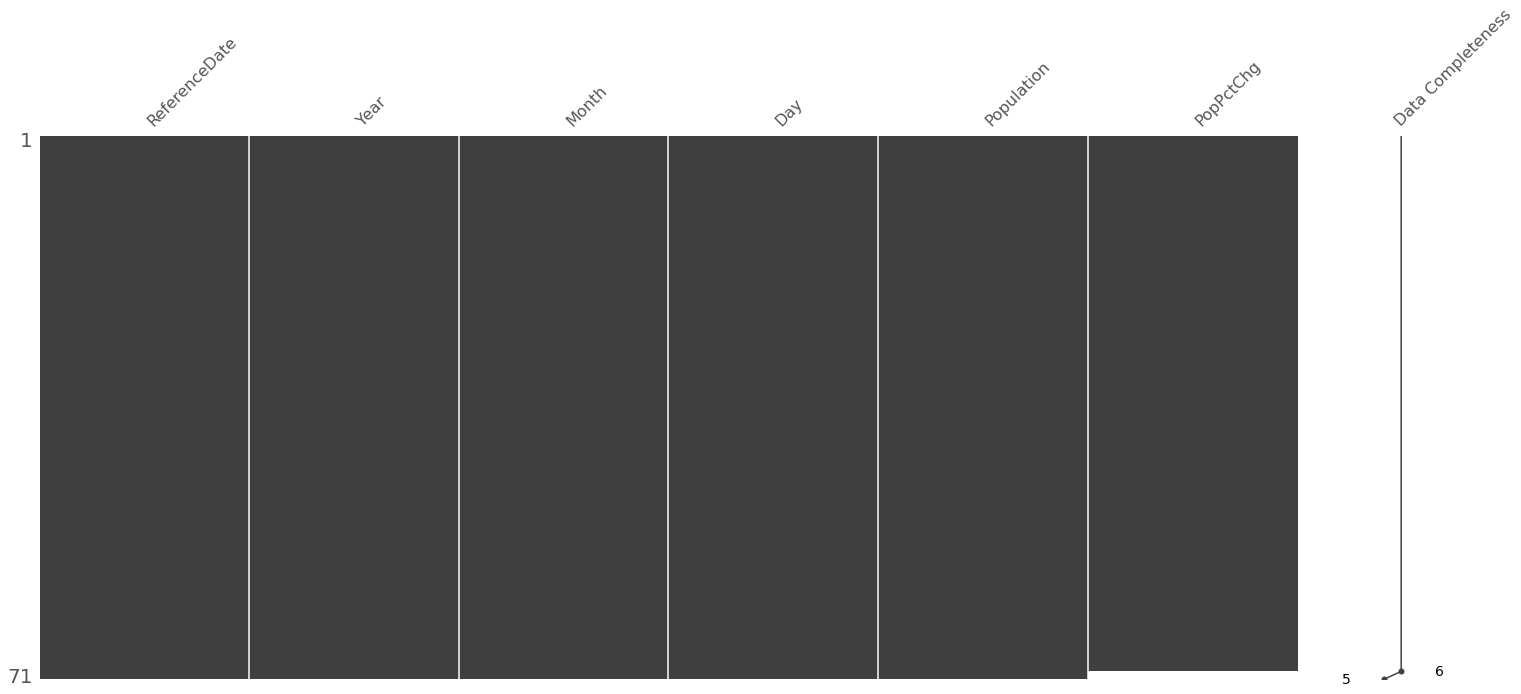

In [14]:
msno.matrix(df1, labels=True, sort='descending')

# Data Visualization

In [15]:
from matplotlib.ticker import FuncFormatter

# y-axis formatter helper function
def million(x, pos):
    'The two args are the value and tick position'
    return '%1.1fM' % (x * 1e-6)

format_mill = FuncFormatter(million)


def percentage(x, pos):
    'The two args are the value and tick position'
    return '%1.2f%%' % (x * 1)

format_pct = FuncFormatter(percentage)


def plot_line(data, x, y, hue=None, size=None, style=None, ci=None, title=None, xlabel=None, ylabel=None, formatter=None):
    # create figure and axis
    fig, ax = plt.subplots()
    fig.autofmt_xdate()

    # plot line chart
    sns.lineplot(
        data=data, 
        x=x, y=y, hue=hue,
        size=size, style=style,
        ci=ci, ax=ax
    )

    # label plot axes
    ax.set(title=title, xlabel=xlabel, ylabel=ylabel)

    # set y-axis formatter
    ax.yaxis.set_major_formatter(formatter=formatter)

    return plot_line

<function __main__.plot_line(data, x, y, hue=None, size=None, style=None, ci=None, title=None, xlabel=None, ylabel=None, formatter=None)>

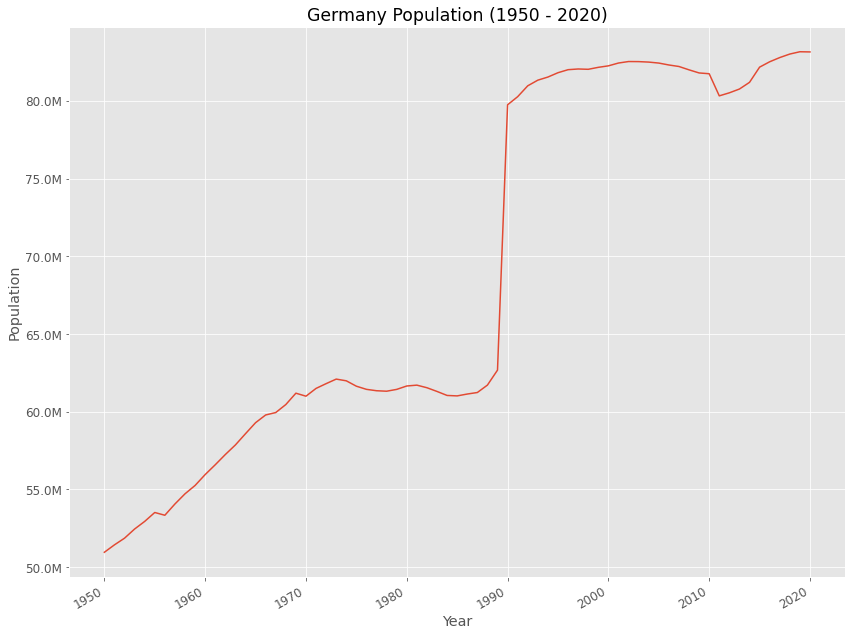

In [16]:
plot_line(
  data=df1,
  x='Year', y='Population',
  title='Germany Population (1950 - 2020)', xlabel='Year', ylabel='Population',
  formatter=format_mill
)

<function __main__.plot_line(data, x, y, hue=None, size=None, style=None, ci=None, title=None, xlabel=None, ylabel=None, formatter=None)>

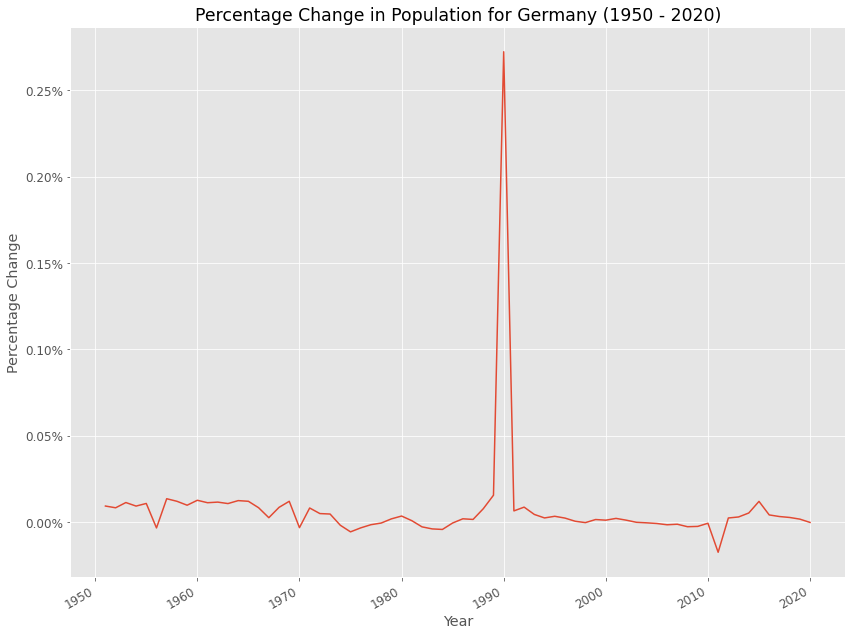

In [17]:
plot_line(
  data=df1,
  x='Year', y='PopPctChg',
  xlabel='Year', ylabel='Percentage Change', title='Percentage Change in Population for Germany (1950 - 2020)',
  formatter=format_pct
)